# Sepsis Prediction Project

In [1]:
# Data Import from Libraries and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic
import joblib
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis


# Feature Engineering for Imputations & Transformations
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu, ks_2samp
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Development and Selection
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


# Model Evaluation
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                            precision_score, recall_score,f1_score, roc_auc_score, roc_curve)


### BUSINESS UNDERSTANDING

### Objective

The primary goal of this project is to develop a predictive model that identifies patients at risk of sepsis based on clinical and demographic data. Early detection will enable timely medical interventions, potentially reducing mortality rates, improving patient outcomes, and lowering healthcare costs.

---

### Problem Statement

- **Problem**: Predict the onset of sepsis early to enable timely interventions.
- **Goal**: Build a machine learning model to classify patients as **Sepsis** or **No Sepsis**.
- **Success Criteria**: 
  - Achieve high **precision** and **recall** (or **F1-score**) to minimize false negatives.
  - Target thresholds: Precision ≥ 0.85, Recall ≥ 0.85, and F1-score ≥ 0.85.

---

### Constraints and Requirements

1. **Data Constraints**:
   - Availability and quality of clinical data (e.g., missing values or imbalanced data).
   - Timeliness: Model predictions must be actionable within critical time windows.

2. **Time Constraints**:
   - Rapid model deployment is essential to assist real-time clinical decision-making.

3. **Ethical Constraints**:
   - Ensure compliance with privacy regulations like HIPAA or GDPR.
   - Protect patient data confidentiality and prevent unintended biases in the model.

4. **Operational Constraints**:
   - Model interpretability: Ensure clinicians can understand and trust the predictions.
   - Integration: The model must integrate seamlessly with existing healthcare workflows.

---

### Stakeholders

- **Primary Stakeholders**: Hospital administrators, healthcare providers (e.g., doctors, nurses).
- **Secondary Stakeholders**: Data scientists, policymakers, patients, and their families.

---

### Benefits and Risks

#### Expected Benefits:
- **Clinical**: Earlier detection of sepsis, reduced mortality rates, and better patient outcomes.
- **Operational**: Enhanced hospital efficiency, reduced ICU admissions, and cost savings.

#### Potential Risks:
- **False Positives**: May lead to unnecessary interventions or resource allocation.
- **False Negatives**: Missed cases could lead to delayed treatment and higher mortality.
- **Bias**: Model may underperform for certain demographic groups, leading to unequal care.

---

### Assumptions

- The clinical data is representative of the population of interest.
- Data is collected uniformly across sources (e.g., consistent PRG measurement units).
- The model will operate in a supportive role, not replacing clinician judgment.
- Sufficient resources (computational and human) are available for development and deployment.

---

### Hypotheses

#### Hypothesis 1
- **Null Hypothesis (H₀)**: There is no difference in the mean age between patients with and without sepsis.
- **Alternative Hypothesis (H₁)**: Patients with sepsis have a significantly different mean age compared to those without sepsis.

#### Hypothesis 2
- **Null Hypothesis (H₀)**: There is no significant difference in the mean of PL: Blood Work Result count between patients who develop sepsis and those who do not.
- **Alternative Hypothesis (H₁)**: Patients who develop sepsis have a significantly different mean of PL: Blood Work Result count compared to those who do not.

---


##### Business Questions

1. Does the presence of insurance affect sepsis occurrence?
2. What are the average values of key health indicators (e.g., PL, PR) for patients with and without sepsis?
3. What is the distribution of platelet levels (PL) across different Sepsis groups?
4. What is the overall age distribution per Sepssis status ?
5. Is there a difference in TS levels among insured and uninsured patients?
6. How do PR (Pulse Rate) and TS (Total Serum) interact for sepsis-positive and sepsis-negative patients?
7. Which features show strong relationships, and how do they cluster together?


#### DATA UNDERSTANDING

In [2]:
# Load the dataset
data= pd.read_csv("data/Paitients_Files_Train.csv")

# Display basic information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB
None
          ID  PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance   Sepssis
0  ICU200010    6  148  72  35    0  33.6  0.627   50          0  Positive
1  ICU200011    1   85  66  29    0  26.6  0.351   31          0  Negative
2  ICU200012    8  183  64   0    0  23.3  0.672   32          1  Positive
3  ICU2

##### Columns Descriptions

- ID: number to represent patient ID
- PRG: Plasma Glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis, and Negative: otherwise

In [3]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include= "all").T)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values: \n", missing_values)
print()

# Summary statistics
print("\nSummary Statistics:")
print(data.describe (include= "all").T)

#Check for missing values
missing_values = data.isnull().sum() 
print("Missing Values: \n", missing_values)
print()

#Check for duplicate values
duplicated_values=data.duplicated().sum()
print("Duplicated Values: \n", duplicated_values)

#Class distribution (Sepsis vs No Sepsis)
print("\nClass Distribution:")
print(data['Sepssis'].value_counts())


Summary Statistics:
           count unique        top freq        mean         std    min    25%  \
ID           599    599  ICU200608    1         NaN         NaN    NaN    NaN   
PRG        599.0    NaN        NaN  NaN    3.824708    3.362839    0.0    1.0   
PL         599.0    NaN        NaN  NaN  120.153589   32.682364    0.0   99.0   
PR         599.0    NaN        NaN  NaN   68.732888   19.335675    0.0   64.0   
SK         599.0    NaN        NaN  NaN   20.562604   16.017622    0.0    0.0   
TS         599.0    NaN        NaN  NaN   79.460768  116.576176    0.0    0.0   
M11        599.0    NaN        NaN  NaN   31.920033    8.008227    0.0   27.1   
BD2        599.0    NaN        NaN  NaN    0.481187    0.337552  0.078  0.248   
Age        599.0    NaN        NaN  NaN   33.290484   11.828446   21.0   24.0   
Insurance  599.0    NaN        NaN  NaN    0.686144    0.464447    0.0    0.0   
Sepssis      599      2   Negative  391         NaN         NaN    NaN    NaN   

      

##### KEY OBSERVATIONS FROM THE DATA

* Dataset Size: The dataset contains 599 records with 11 columns, including identifiers, numerical features, and a categorical target column (Sepssis).

* Target Variable: The Sepssis column represents the presence (Positive) or absence (Negative) of sepsis. This is a binary classification problem.

* Numerical Features: Most columns are numerical (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age), suitable for machine   learning algorithms.

* Categorical Features: The Sepssis column and Insurance are categorical.

* Data Range: Features like TS have a wide range (0 to 846), which may require normalization or scaling.

* Potential Outliers: Columns like TS and SK have extreme values, indicating possible outliers.

* Imbalance Check: The Sepssis column needs to be checked for class imbalance, as this affects model performance.

#### Univariate Analysis

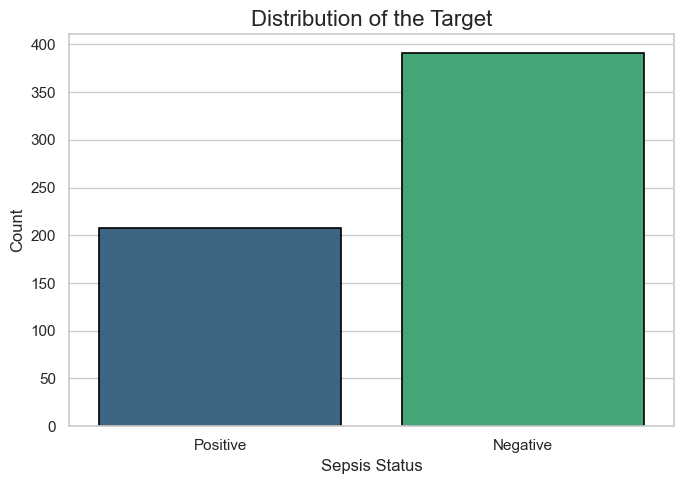

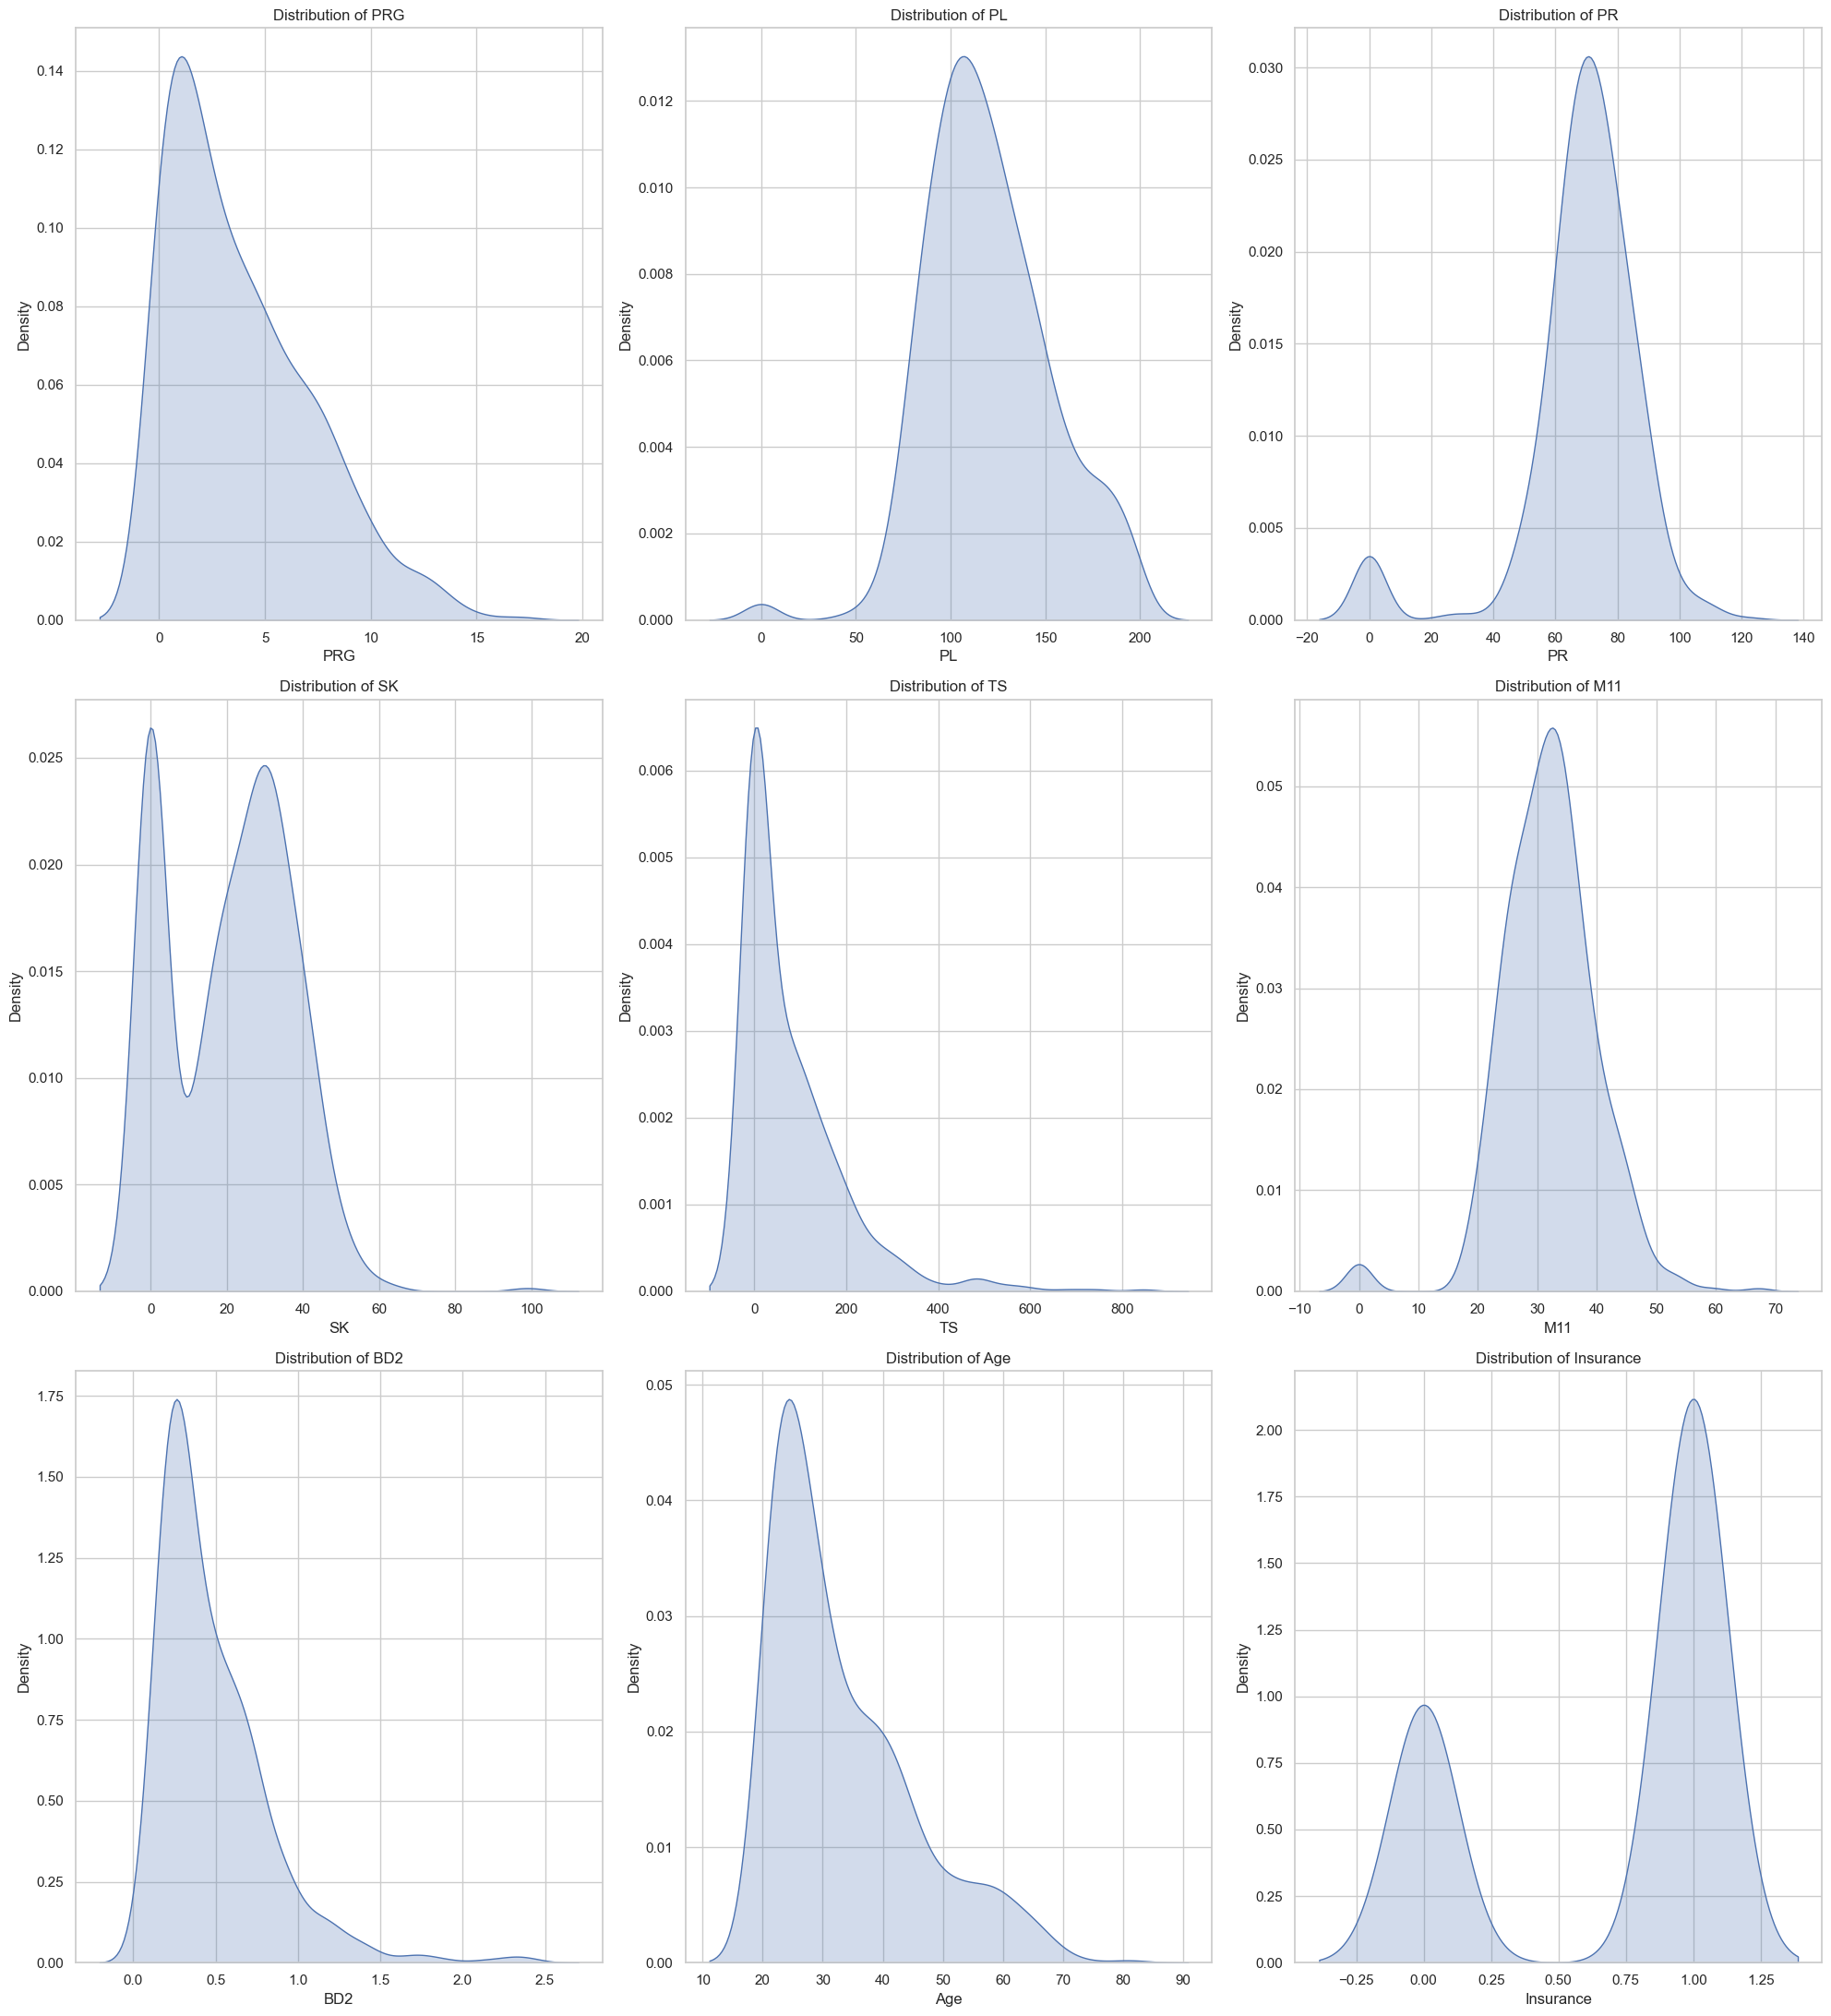

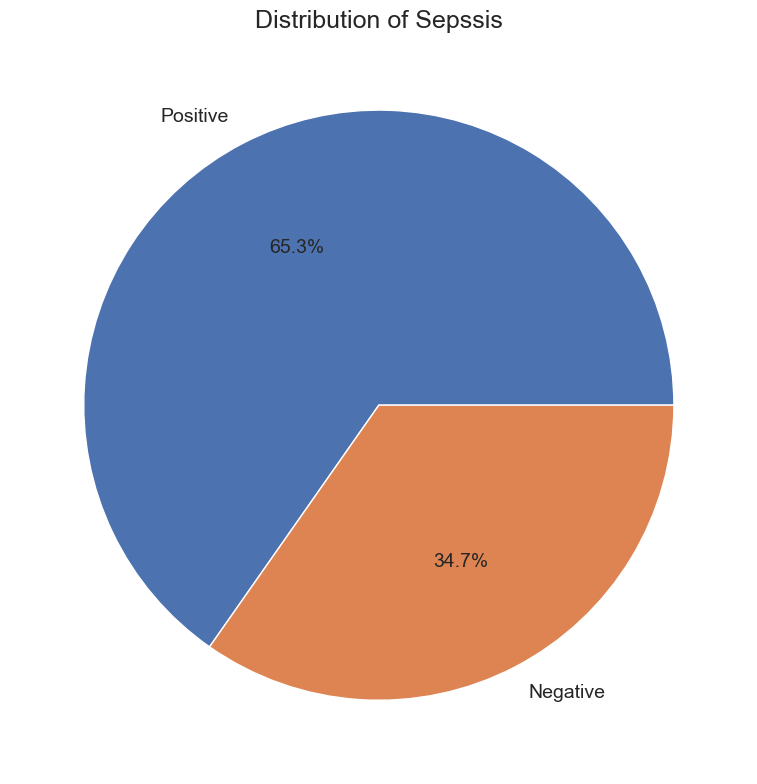

In [4]:
'''Checking the distribution of each column'''
# Visualize target variable
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
sns.countplot(x="Sepssis", data=data, palette="viridis", hue='Sepssis', edgecolor="black", linewidth=1.2, legend=False)
plt.title("Distribution of the Target", fontsize=16)
plt.xlabel("Sepsis Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Visualize numerical variables
# Exclude ID column
data = data.drop('ID', axis=1)
numerical_cols = data.select_dtypes(include=["float64", "int64"]).columns

fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(20, 6*(len(numerical_cols)+2)//3))

for col, ax in zip(numerical_cols, axes.flat):
    sns.kdeplot(data[col], ax=ax, fill=True)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Visualize categorical variables
categorical_cols = data.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    plt.pie(data[col].value_counts(), labels=data[col].unique(), autopct='%1.1f%%', textprops={'fontsize': 14})
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.tight_layout()
    plt.show()


#### Bivariate Analysis

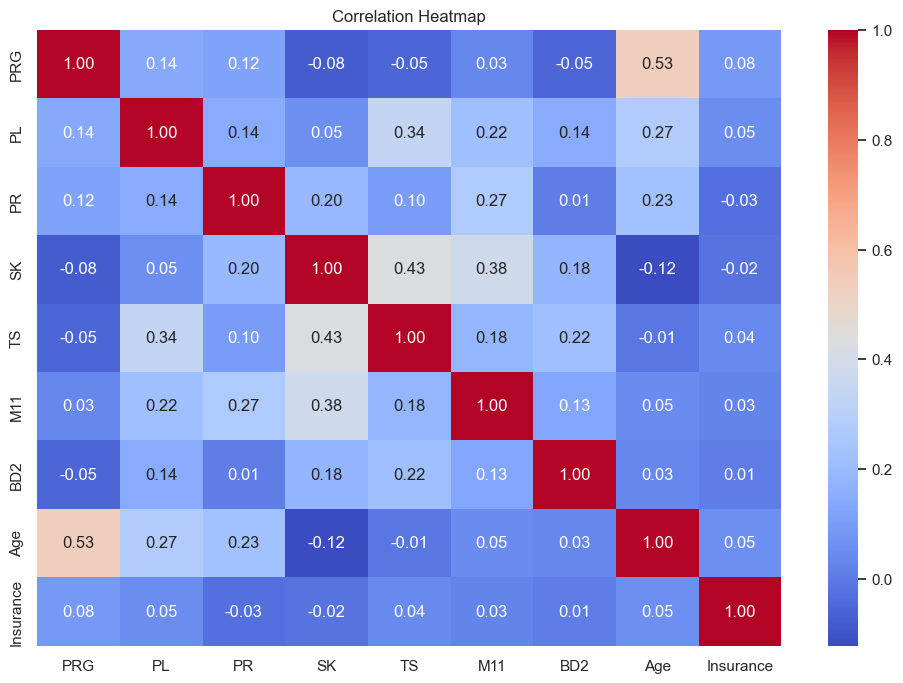

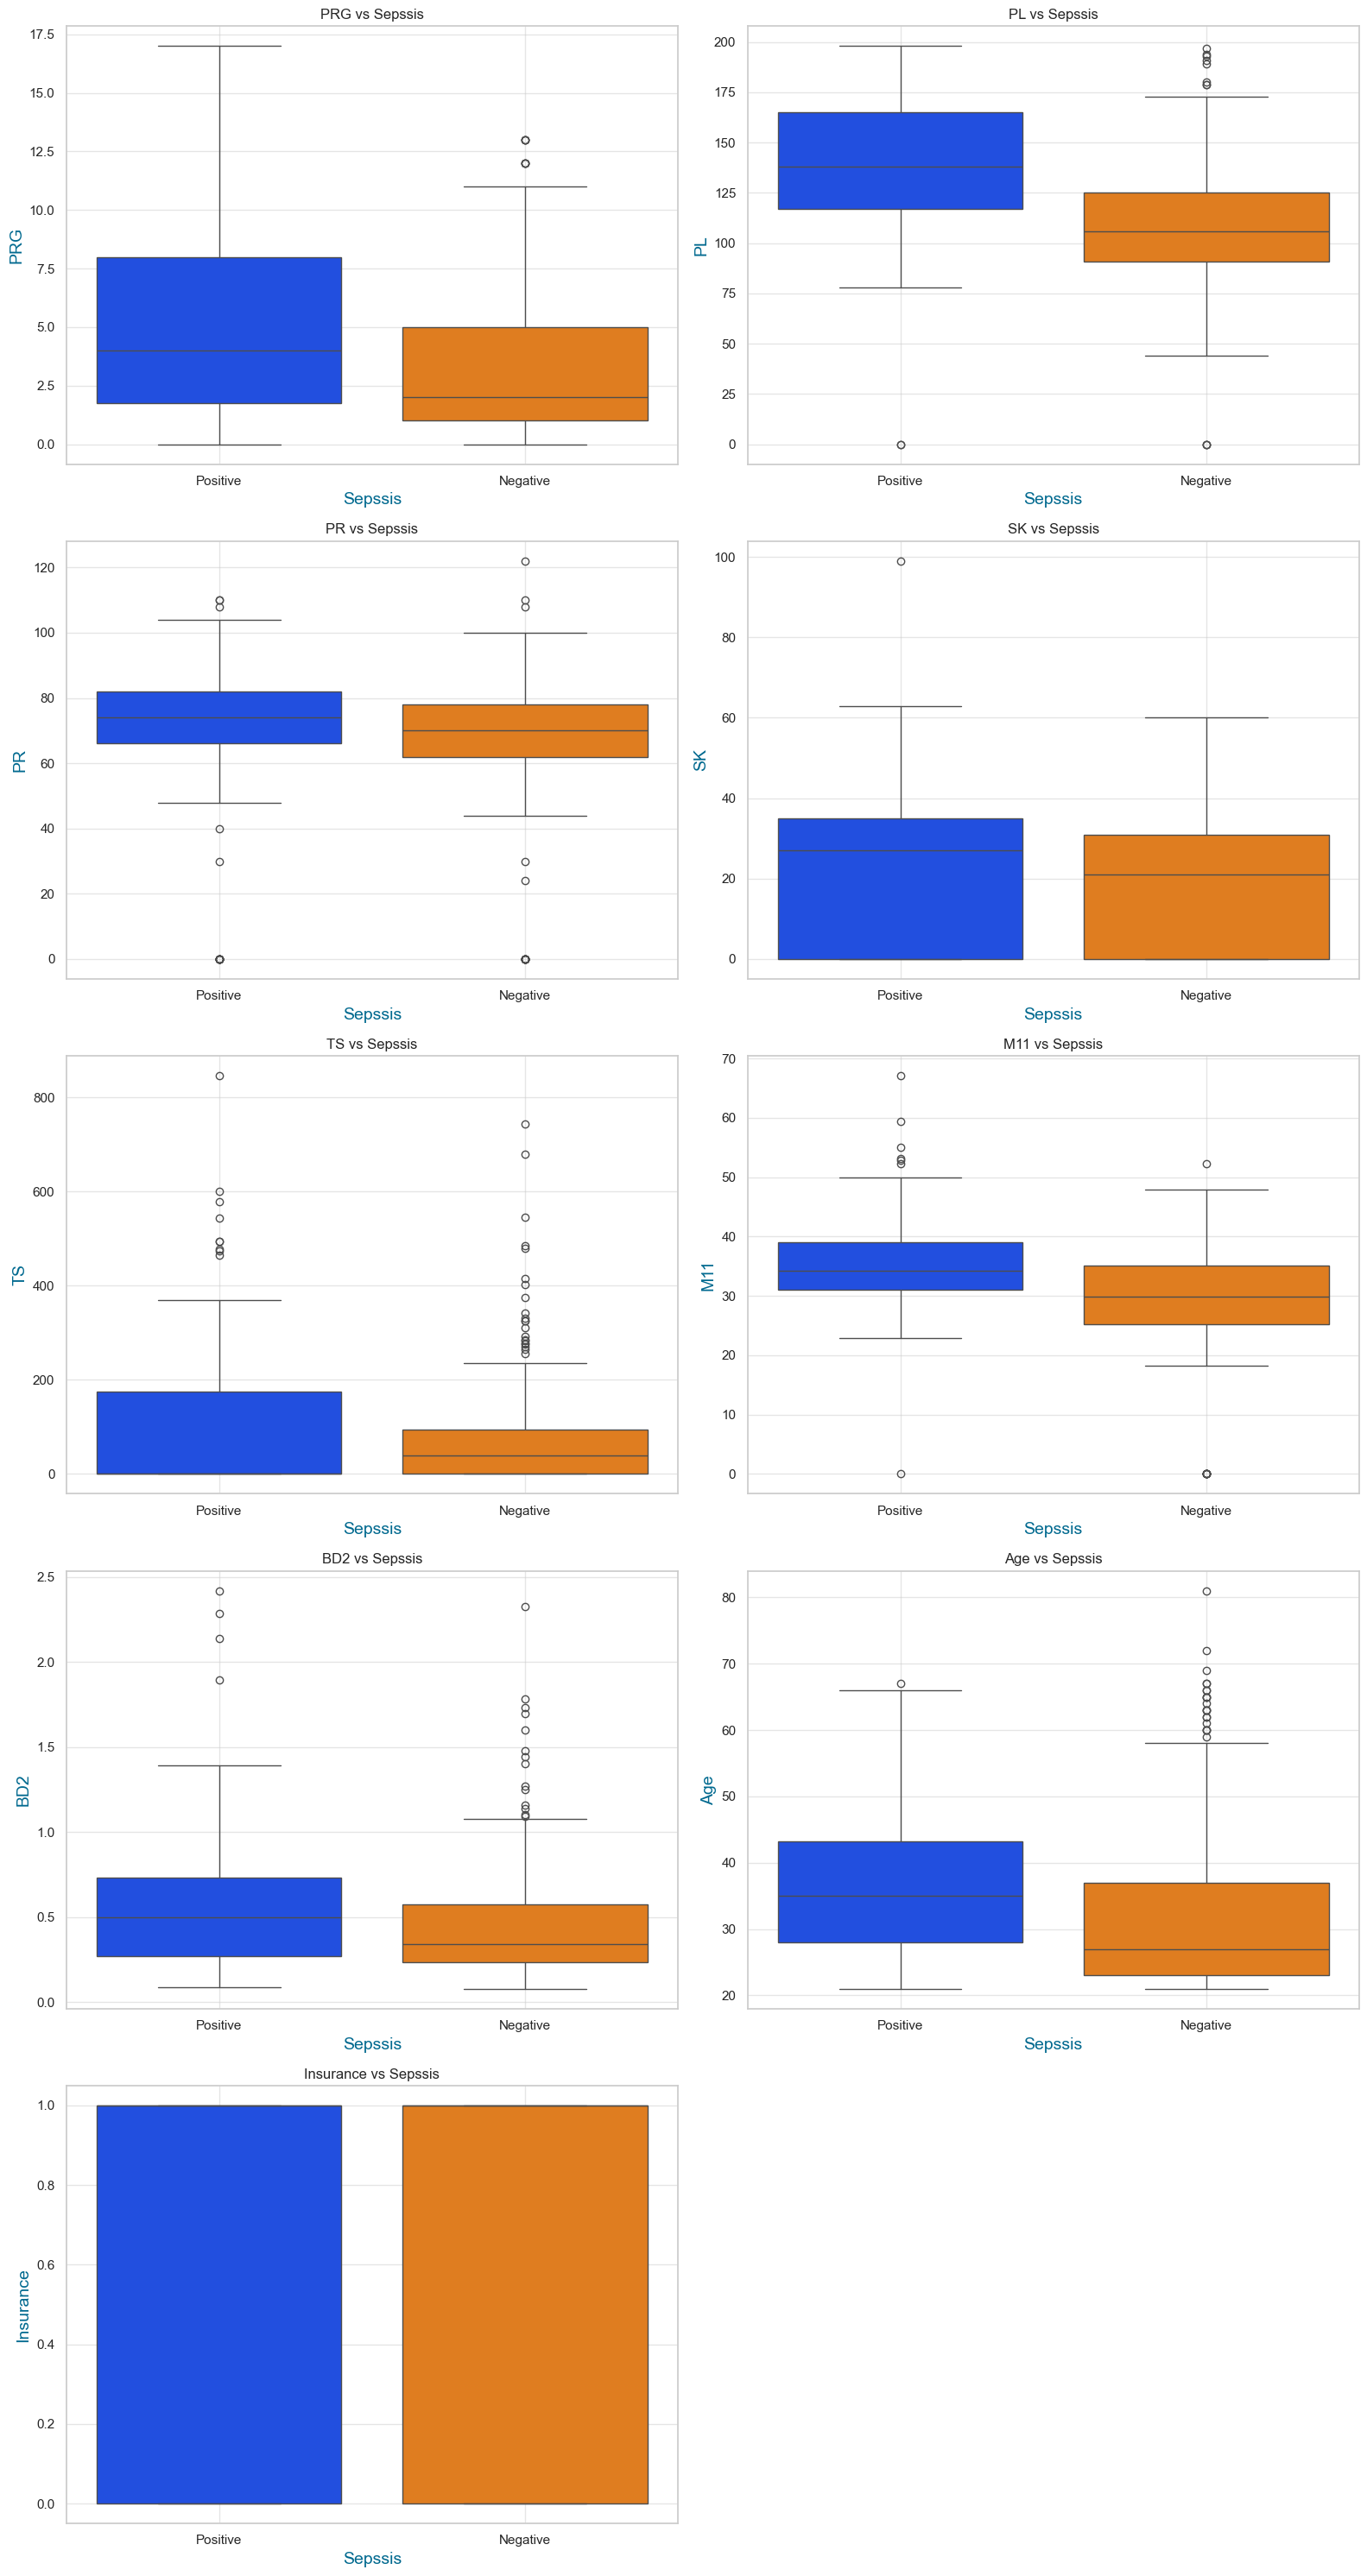

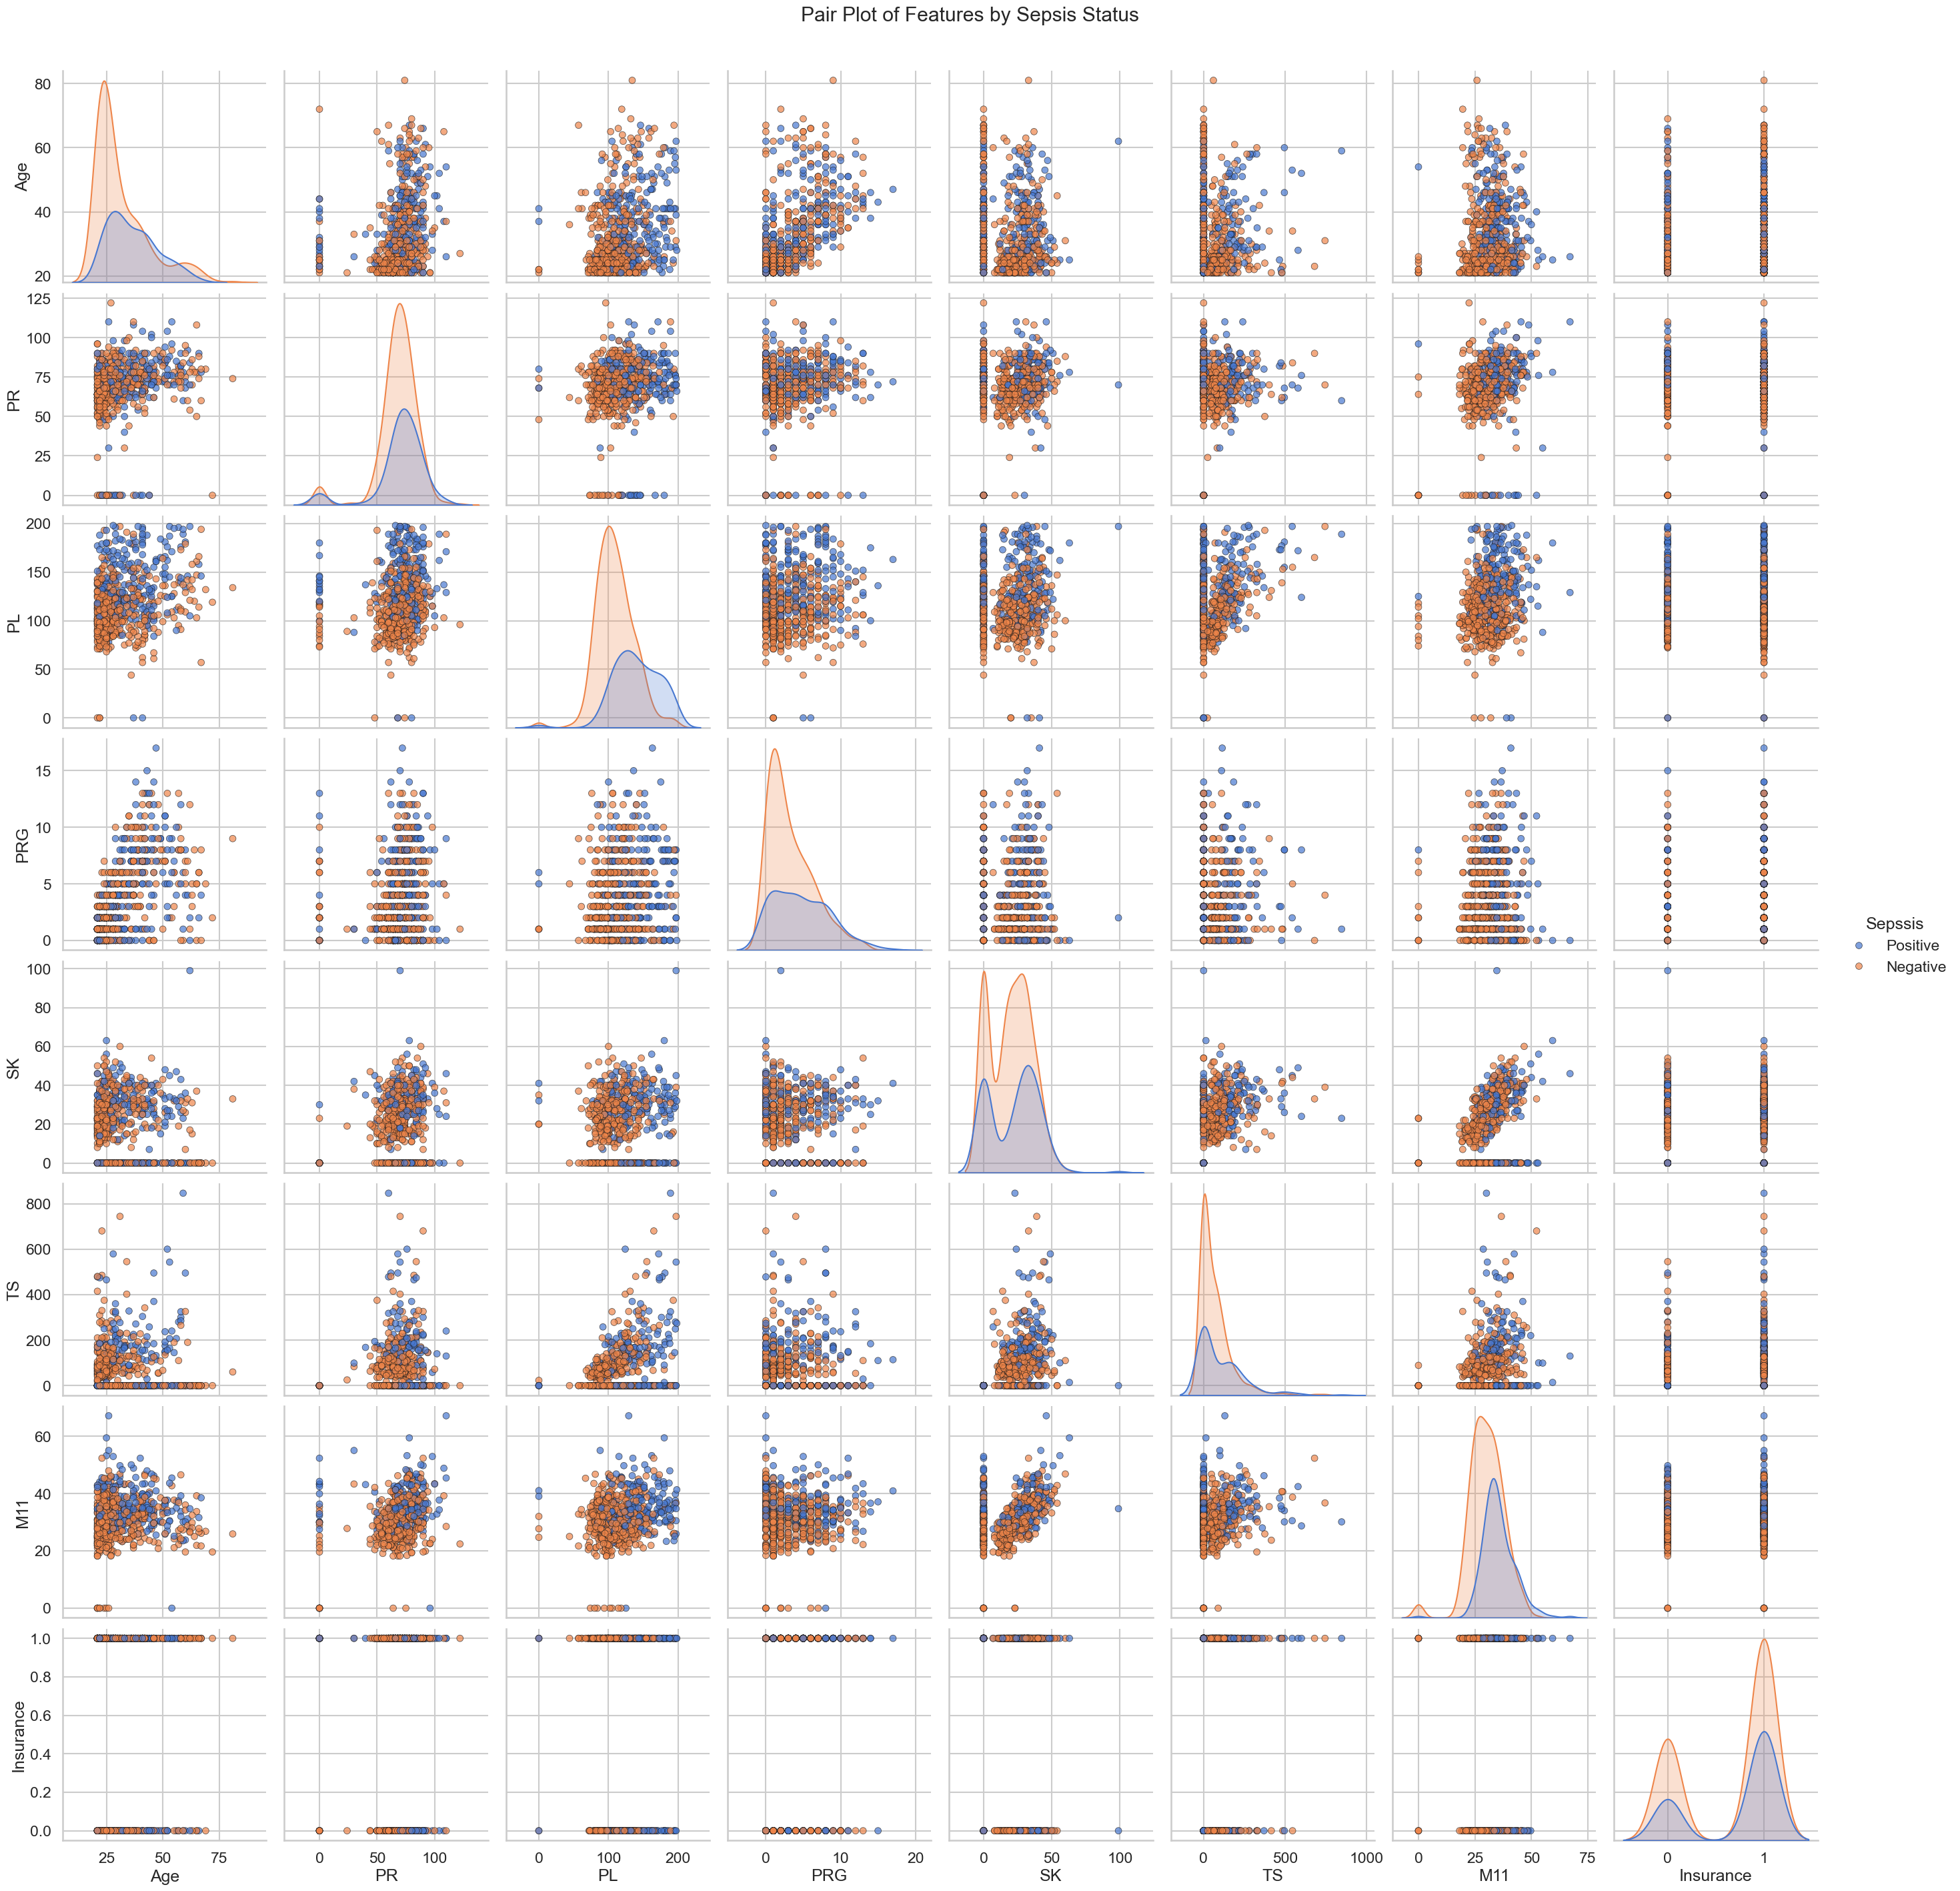

In [5]:
'''Examine the dependencies between features and target.'''

# Analysis by Heatmap
# Using Correlation heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm") 
plt.title("Correlation Heatmap")
plt.show()


# Analysis by Boxplot
# Relationship with target variable
# Define the target column
target_col = 'Sepssis'  # Target column containing 'positive' and 'negative'
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))


for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=target_col, y=col, data=data, palette="bright", ax=axes[row, col_idx], hue=target_col, legend=False)
    axes[row, col_idx].set_title(f"{col} vs {target_col}")
    axes[row, col_idx].set_xlabel(target_col, fontsize=14, color="#00698f")
    axes[row, col_idx].set_ylabel(col, fontsize=14, color="#00698f")
    axes[row, col_idx].grid(True, alpha=0.5)

# Remove unused subplots
for i in range(len(numerical_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.show()


# Analysis by pairplot
sns.set(style="whitegrid", context="talk", palette="muted")
pairplot = sns.pairplot(
    data,
    hue="Sepssis",
    vars=["Age", "PR", "PL", "PRG","SK", "TS", "M11","Insurance"],
    diag_kind="kde",
    height=3.5,
    plot_kws={"alpha": 0.7, "s": 50, "edgecolor": "k"},
    diag_kws={"fill": True}
)
pairplot.fig.suptitle("Pair Plot of Features by Sepsis Status", y=1.02)
plt.show()

#### Multivariate Analysis

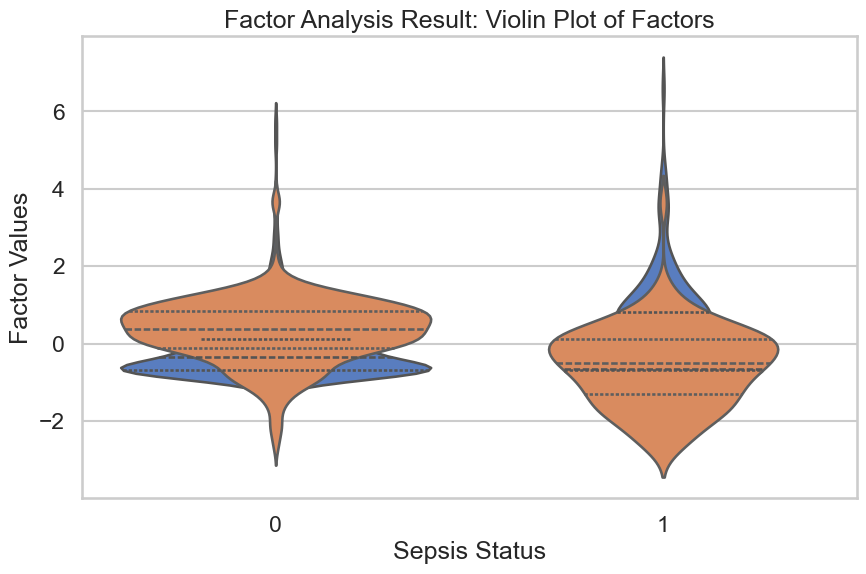

In [6]:
# Application of Factor Analysis for combined factors

features = data[['Age', 'PR', 'PL', 'SK', 'TS', 'PRG', 'BD2', 'M11']] 

# Perform Factor Analysis
fa = FactorAnalysis(n_components=2) 
factors = fa.fit_transform(features) 

# Create a DataFrame with factor results
factor_df = pd.DataFrame(data=factors, columns=['Factor1', 'Factor2'])

# Map Sepsis status to numerical values
sepsis_map = data['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Plotting factor results using violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=sepsis_map, y='Factor1', data=factor_df, inner='quartile')
sns.violinplot(x=sepsis_map, y='Factor2', data=factor_df, inner='quartile')

plt.title('Factor Analysis Result: Violin Plot of Factors')
plt.xlabel('Sepsis Status')
plt.ylabel('Factor Values')
# plt.legend(title='Sepsis Status')
plt.show()


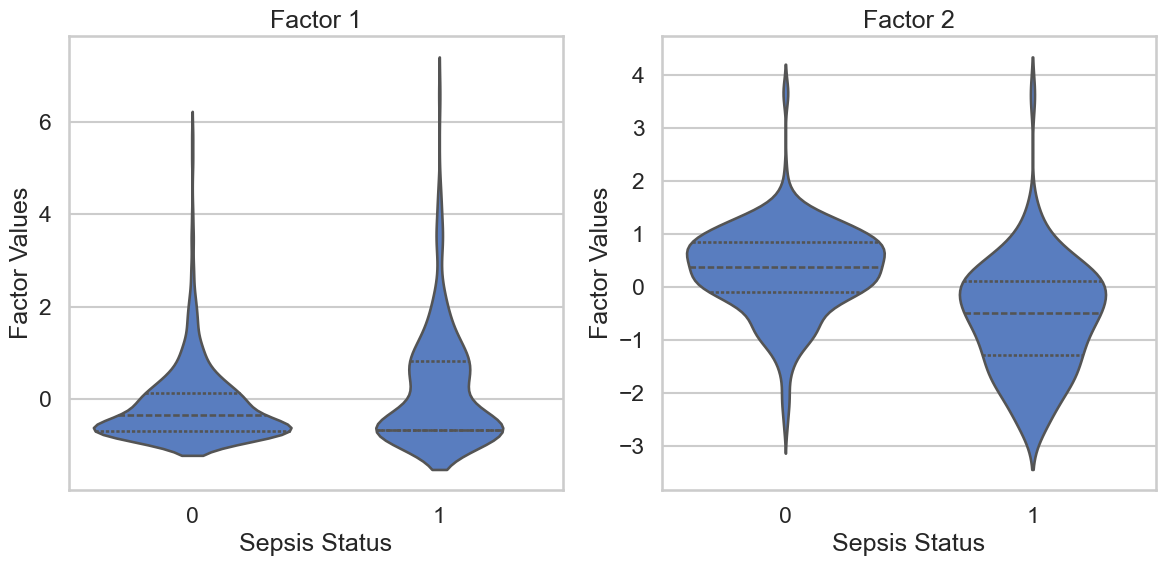

In [7]:
# Application of Factor Analysis for splitted factors
# Plotting factor results using violin plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x=sepsis_map, y='Factor1', data=factor_df, inner='quartile')
plt.title('Factor 1')
plt.xlabel('Sepsis Status')
plt.ylabel('Factor Values')

plt.subplot(1, 2, 2)
sns.violinplot(x=sepsis_map, y='Factor2', data=factor_df, inner='quartile')
plt.title('Factor 2')
plt.xlabel('Sepsis Status')
plt.ylabel('Factor Values')

plt.tight_layout()
plt.show()


In [8]:
# Get factor loadings
loadings = fa.components_.T  # Transpose for easier interpretation
loadings_df = pd.DataFrame(loadings, columns=['Factor1', 'Factor2'], index=features.columns)

# Display factor loadings
print(loadings_df)

        Factor1    Factor2
Age   -0.119713  -3.530326
PR     1.852037  -2.300053
PL    11.241581 -30.482783
SK     6.860202   1.588101
TS   116.468891   0.549572
PRG   -0.181512  -0.575959
BD2    0.073758  -0.025047
M11    1.484781  -1.303404


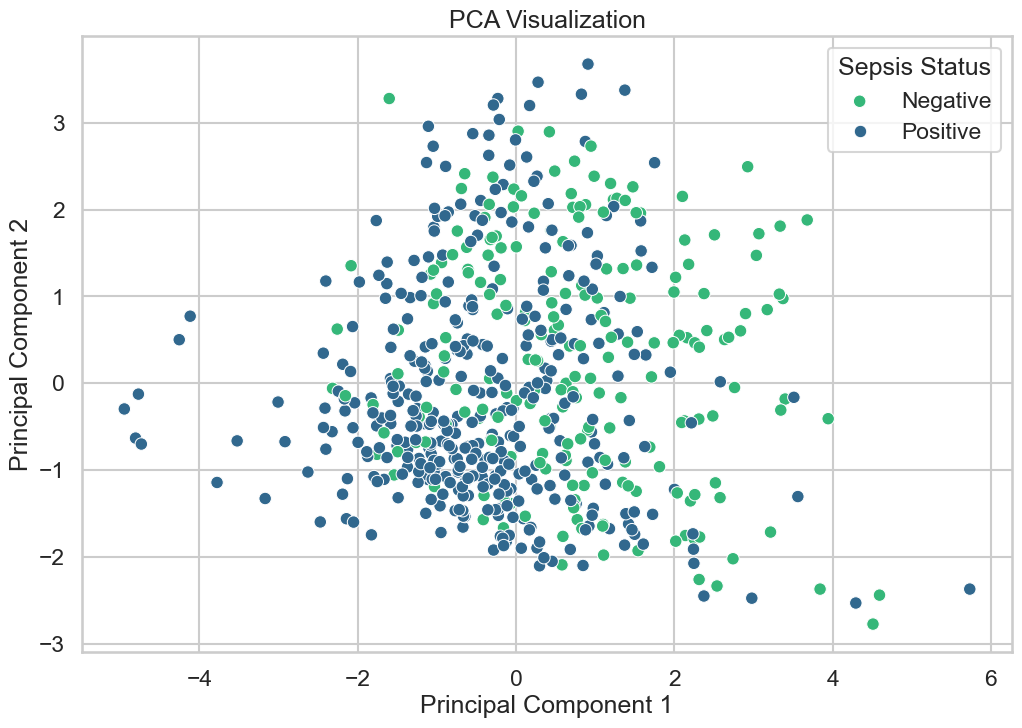

In [9]:
# Application of PCA 
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Add target variable mapping
target = data["Sepssis"].map({"Positive": 1, "Negative": 0})

# Plot PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=target, palette="viridis")
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Sepsis Status", labels=["Negative", "Positive"])
plt.show()

In [10]:
# Perform PCA
pca = PCA(n_components=2)  # Specify number of components
pca_result = pca.fit_transform(features)

# Get the loadings (components)
loadings = pca.components_.T  # Transpose for easier interpretation

# Check shape of loadings
print("Shape of loadings:", loadings.shape)

# Create a DataFrame with loadings for better visualization
loadings_df = pd.DataFrame(loadings, index=features.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Print the loadings
print("PCA Loadings:")
print(loadings_df)

Shape of loadings: (8, 2)
PCA Loadings:
          PC1       PC2
Age -0.000403  0.137305
PR   0.016904  0.122286
PL   0.101459  0.974669
SK   0.059176 -0.063083
TS   0.992846 -0.098437
PRG -0.001446  0.022250
BD2  0.000635  0.000714
M11  0.013167  0.045273


Optimization terminated successfully.
         Current function value: 0.474232
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Sepssis   No. Observations:                  599
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.2656
Time:                        18:22:57   Log-Likelihood:                -284.07
converged:                       True   LL-Null:                       -386.79
Covariance Type:            nonrobust   LLR p-value:                 2.386e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5604      0.852    -10.050      0.000     -10.230      -6.891
PRG            0.1176      0.

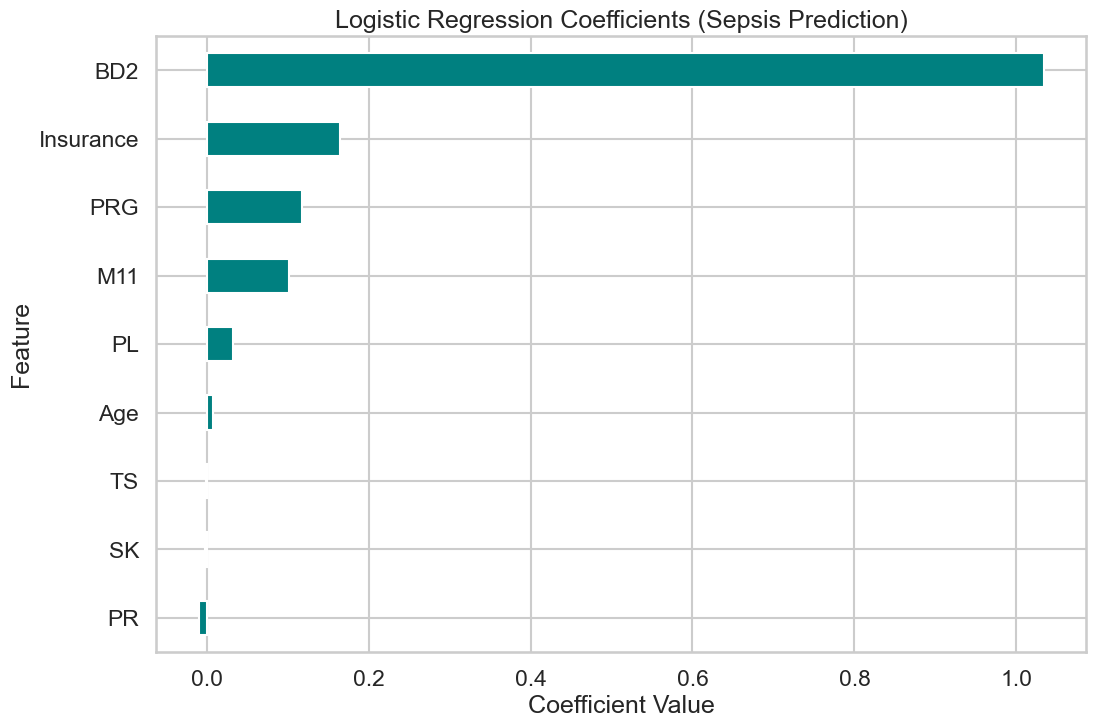

In [11]:
# Application of Logistic Regression Coefficient

# Prepare data for logistic regression
target = data["Sepssis"].map({"Positive": 1, "Negative": 0})
logit_model = sm.Logit(target, sm.add_constant(numeric_data))

# Fit the model
result = logit_model.fit()

# Display the summary
print(result.summary())

# Plot coefficients
coefficients = result.params[1:]
plt.figure(figsize=(12, 8))
coefficients.sort_values().plot(kind="barh", color="teal")
plt.title("Logistic Regression Coefficients (Sepsis Prediction)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

#### DATA PREPARATION

In [12]:
"""Preprocess the data by handling missing values, converting variables, and 
dividing it into training and validation subsets."""

# Separate features and target variable
X = data.drop(columns=['Sepssis']) # Drop target column
y = data['Sepssis'] # Target column


# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
                                                
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

# Print shapes of splits
print(f"Training set shape: {X_train.shape}") 
print(f"Validation set shape: {X_val.shape}")
print(f"Training set shape: {y_train_encoded.shape}")
print(f"Validation set shape: {y_val_encoded.shape}")
print()
print()

# Number of features
input_features = X.columns
print("Input Features:")
print(input_features)
print()

# Feature preprocessing pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='median'), input_features),  # Handle missing values
        ("outlier_handler", RobustScaler(), input_features),  # Handle outliers
        ("scaler", QuantileTransformer(output_distribution='normal', n_quantiles=330), input_features)  # Normalize
    ]
)

# Calculate VIF for each feature
# X: numeric data with numerical columns, dropna() to temporarily drop missing values for VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.dropna().values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)
print()

Training set shape: (419, 9)
Validation set shape: (180, 9)
Training set shape: (419,)
Validation set shape: (180,)


Input Features:
Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

Variance Inflation Factor (VIF):
     Feature        VIF
0        PRG   3.226812
1         PL  16.216312
2         PR  14.072380
3         SK   3.933874
4         TS   2.035340
5        M11  18.011167
6        BD2   3.224233
7        Age  13.294282
8  Insurance   3.072380



In [13]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Initialize scaler
scaler = StandardScaler()

# Scale numeric data
scaled_data = scaler.fit_transform(numeric_data)

# Initialize PCA with the number of components to keep
pca = PCA(n_components=9)  # Adjust n_components as needed

# Fit PCA to the data and transform
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(
    data=principal_components, 
    columns=[f'PC{i}' for i in range(1, pca.n_components+1)]
)

print(pca_df.head(6))  # Print the first few rows
print()
print()

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print()

cumulative_variance = explained_variance.cumsum()
print(f"Cumulative Explained Variance: {cumulative_variance}")

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.026903  0.982089  0.698976 -1.533990  0.349310  0.307859  0.526109   
1 -1.225623 -0.866582  1.173052 -0.942248  0.133213  0.525149 -0.245541   
2 -0.249707  1.695084 -1.664082 -0.361797 -0.298669 -0.914667  0.005047   
3 -1.106758 -1.110170  0.180677  1.115890 -0.495772  0.254917 -0.492380   
4  2.313200 -2.261041 -3.123187 -1.107968  3.600102 -0.949764  0.839987   
5 -1.336268  0.986037 -0.042370  0.649569 -0.427697 -0.505372 -0.451579   

        PC8       PC9  
0  0.407746  1.161722  
1  0.553138  0.516687  
2 -1.477929  0.654487  
3  0.055158 -0.137039  
4  0.510351  0.029908  
5 -0.554960 -0.214728  


Explained Variance Ratio: [0.2313302  0.19066612 0.12146057 0.10854176 0.0932426  0.08437071
 0.07797801 0.04691597 0.04549405]

Cumulative Explained Variance: [0.2313302  0.42199632 0.54345689 0.65199865 0.74524125 0.82961197
 0.90758998 0.95450595 1.        ]


#### MODELING

In [14]:
# Modeling with imbalanced train_set data

# Train a classification model and tune its parameters.

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
  
}

# For the imbalanced data
# Define preprocessing pipeline for numerical features
"""Pipeline for reusability and systematic transformation."""

results_table = pd.DataFrame (columns=['name', 'accuracy', 'precision', 'recall', 'f1_score']) 

all_pipelines ={}

#Iterate through the dictionary items (key-value pairs)
for name, model in models.items():
    # Use_the_name and model
    # print(f"Model Name: {name}")
    # print(f"Model: {model}")
    # print()

    # Define final pipeline with PCA and classifier for the imbalanced class
    pipeline = Pipeline(steps=[
                 ('preprocessor', preprocessor), # Preprocess features
                 ("pca", PCA(n_components=7)), # Reduce dimensions
                 ('model', model) # Add the classifier
    ])
    
    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_val)

    metrics = classification_report(y_val_encoded,y_pred, output_dict=True)

    all_pipelines [name] = pipeline

    # picking values from metrics dict
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics ['weighted avg']['recall']
    f1 = metrics ['weighted avg']['f1-score']

    # Add values to the results table
    results_table.loc[len(results_table)] = [name, accuracy, precision, recall, f1]

# Sort the table by f1 score
results_table = results_table.sort_values('f1_score', ascending=False)

# Show results
print("Results:")
print(results_table)

Results:
                  name  accuracy  precision    recall  f1_score
0  Logistic Regression  0.777778   0.773382  0.777778  0.773918
2        Random Forest  0.766667   0.762222  0.766667  0.755556
1  K-Nearest Neighbors  0.727778   0.720767  0.727778  0.722349


In [15]:
# Modeling with balanced train_set data

# Train a classification model and tune its parameters.

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    # "LightGBM": lgb.LGBMClassifier(n_jobs=-1, random_state=42)
}

# Define oversampling technique
sampler = SMOTE(random_state=42)

# For the balanced data
# Define preprocessing pipeline for numerical features
"""Pipeline for reusability and systematic transformation."""

balanced_results_table = pd.DataFrame(columns=['name', 'accuracy', 'precision', 'recall', 'f1_score'])
balanced_pipelines = {}

# Iterate through the dictionary items (key-value pairs)
for name, model in models.items():
    from imblearn.pipeline import Pipeline as ImbPipeline

    # Define final pipeline with PCA and classifier for the balanced class
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocess features
        ('smote_sampler', SMOTE(random_state=42)),  # Handle class imbalance
        ("pca", PCA(n_components=7)),  # Reduce dimensions
        ('model', model)  # Add the classifier
    ])
    
    # Fit pipeline
    pipeline.fit(X_train, y_train_encoded)

    # Predict and evaluate
    y_pred = pipeline.predict(X_val)
    balance_metrics = classification_report(y_val_encoded, y_pred, output_dict=True)

    # Store pipeline and metrics
    balanced_pipelines[name] = pipeline

    # Extract metrics
    accuracy = balance_metrics['accuracy']
    precision = balance_metrics['weighted avg']['precision']
    recall = balance_metrics['weighted avg']['recall']
    f1 = balance_metrics['weighted avg']['f1-score']

    # Add values to the results table
    balanced_results_table.loc[len(balanced_results_table)] = [name, accuracy, precision, recall, f1]

# Sort the table by f1 score
balanced_results_table = balanced_results_table.sort_values('f1_score', ascending=False)

# Show results
print("Balanced Results:")
print(balanced_results_table)

Balanced Results:
                  name  accuracy  precision    recall  f1_score
0  Logistic Regression  0.750000   0.766447  0.750000  0.754338
2        Random Forest  0.755556   0.752430  0.755556  0.753602
1  K-Nearest Neighbors  0.666667   0.701176  0.666667  0.674146


##### Hyperparameter Tuning

c:\Users\PRINCE\OneDrive\Desktop\Accessory\PROJECTS\Azubi\FastApi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


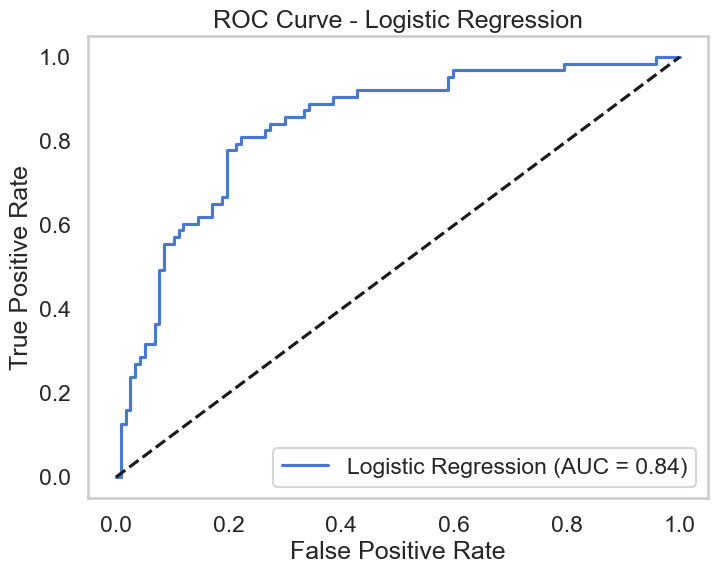

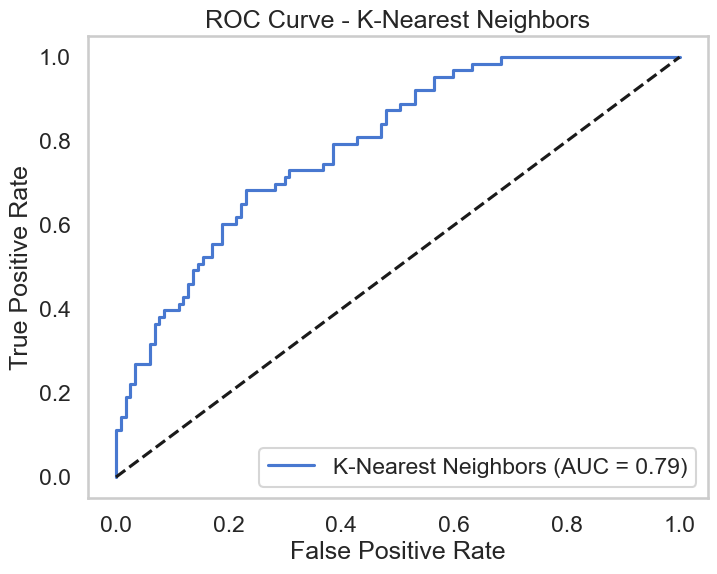

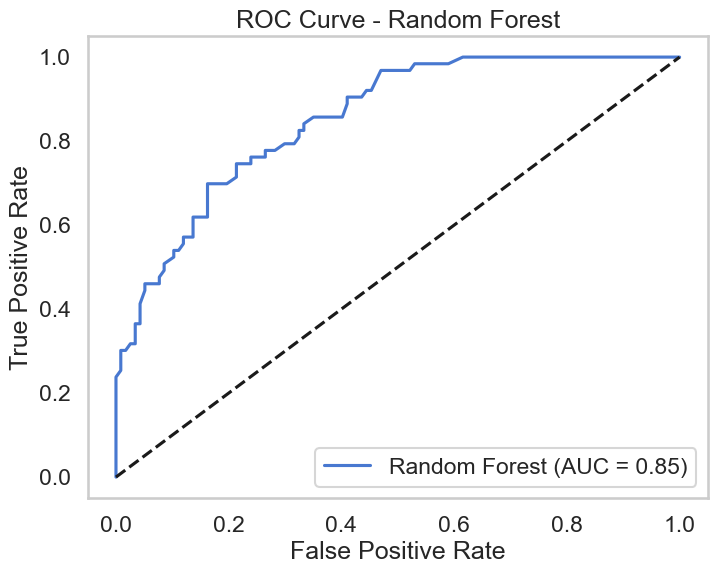

Tuned Model Results:
                  name  accuracy  precision    recall  f1_score   roc_auc
2        Random Forest  0.761111   0.755198  0.761111  0.755049  0.853209
0  Logistic Regression  0.766667   0.761818  0.766667  0.762614  0.836793
1  K-Nearest Neighbors  0.727778   0.719000  0.727778  0.719283  0.790530


In [16]:
# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'model__C': [0.1, 1, 10],  # Regularization parameter
        'model__solver': ['lbfgs', 'liblinear'],  # Solvers
        'model__max_iter': [2000]  # Maximum number of iterations
    },
    "K-Nearest Neighbors": {
        'model__n_neighbors': [3, 5, 7],  # Number of neighbors
        'model__weights': ['uniform', 'distance']  # Weighting scheme
    },
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],  # Number of trees
        'model__max_depth': [None, 10, 20]  # Maximum depth of trees
    },
}


# Create a StratifiedKFold object for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame to store tuned results
tuned_models_df = pd.DataFrame(columns=['name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'])

# Iterate through models and perform GridSearchCV
for name, model in models.items():
    
    # Build pipeline for each model
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),  # Preprocess features
        ('model', model)  # Add classifier
    ])
    
    # Define GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids.get(name, {}),  # Get params specific to the model
        cv=skf,
        scoring='f1_weighted',  # Optimize for weighted F1-score
        n_jobs=-1
    )
    
    # Perform grid search
    grid_search.fit(X_train, y_train_encoded)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Evaluate on validation data
    y_pred = best_model.predict(X_val)
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]  # Probability scores for ROC curve
    metrics = classification_report(y_val_encoded, y_pred, output_dict=True)
    
    # Extract metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_val_encoded, y_pred_proba)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_val_encoded, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # Add to results DataFrame
    tuned_models_df.loc[len(tuned_models_df)] = [name, accuracy, precision, recall, f1, roc_auc]

# Sort and display results
tuned_models_df = tuned_models_df.sort_values('roc_auc', ascending=False)
print("Tuned Model Results:")
print(tuned_models_df)


### Hypothesis Tests & Business Questions Tackled

In [17]:
# Hypothesis 1
# Null Hypothesis (H0): There is no difference in the mean age between patients with and without sepsis.
# Alternative Hypothesis (H1): Patients with sepsis have a significantly different mean age compared to those without sepsis.

# Split data into two groups based on the target variable
sepsis_group = data[data['Sepssis'] == 'Positive']['Age']
no_sepsis_group = data[data['Sepssis'] == 'Negative']['Age']


# Check sample sizes
print("Sepsis Infested Group Size:", len(sepsis_group))
print("Sepsis Free Group Size:", len(no_sepsis_group))

# Mann-Whitney U Test (or Wilcoxon Rank-Sum Test)
if len(sepsis_group) >= 5 and len(no_sepsis_group) >= 5:
    u_stat, u_p_value = mannwhitneyu(sepsis_group, no_sepsis_group)
    print("\nMann-Whitney U Test:")
    print("U-Statistic:", u_stat)
    print("P-Value:", u_p_value)
else:
    print("Mann-Whitney U Test: Sample sizes too small.")

# Kolmogorov-Smirnov Test (requires larger sample sizes)
if len(sepsis_group) >= 20 and len(no_sepsis_group) >= 20:
    ks_stat, ks_p_value = ks_2samp(sepsis_group, no_sepsis_group)
    print("\nKolmogorov-Smirnov Test:")
    print("KS-Statistic:", ks_stat)
    print("P-Value:", ks_p_value)
else:
    print("Kolmogorov-Smirnov Test: Sample sizes too small.")

# Interpret results
alpha = 0.05

if 'u_p_value' in locals():
    print("\nMann-Whitney U Test Interpretation:")
    if u_p_value < alpha:
        print("Reject Null Hypothesis: Median age differs significantly between patients with and without sepsis.")
    else:
        print("Fail to Reject Null Hypothesis: No significant difference in median age.")

if 'ks_p_value' in locals():
    print("\nKolmogorov-Smirnov Test Interpretation:")
    if ks_p_value < alpha:
        print("Reject Null Hypothesis: Age distributions differ significantly between patients with and without sepsis.")
    else:
        print("Fail to Reject Null Hypothesis: No significant difference in age distributions.")


Sepsis Infested Group Size: 208
Sepsis Free Group Size: 391

Mann-Whitney U Test:
U-Statistic: 54836.5
P-Value: 1.9719624253603723e-12

Kolmogorov-Smirnov Test:
KS-Statistic: 0.31081546330906945
P-Value: 4.148871074130695e-12

Mann-Whitney U Test Interpretation:
Reject Null Hypothesis: Median age differs significantly between patients with and without sepsis.

Kolmogorov-Smirnov Test Interpretation:
Reject Null Hypothesis: Age distributions differ significantly between patients with and without sepsis.


Spearman Rank Correlation Coefficient (ρ): 0.1415
P-value: 0.0005

Reject the null hypothesis. There is a statistically significant dependency of the deviation counts of PRG: Plasma Glucose Results on the frequency of PL: Blood Work Results between patients who develop sepsis and those who do not.

There is a positive correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts.

The correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts is weak.



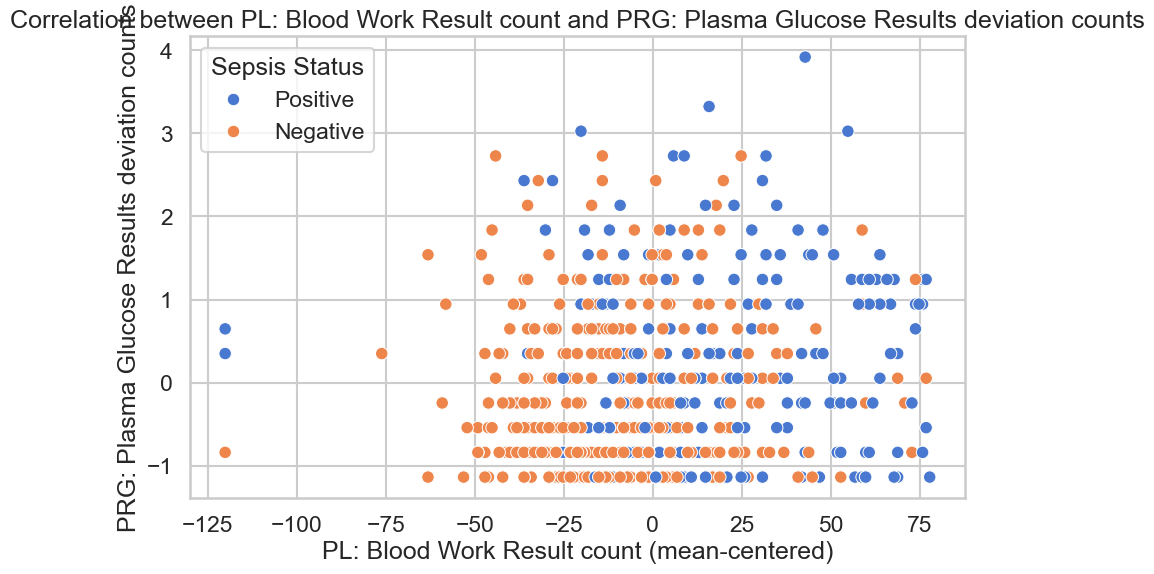

In [18]:
# Hypothesis 2

''' # Null Hypothesis (H₀): There is no significant difference in the deviation counts of 
PRG: Plasma Glucose Results and the frequency of PL: Blood Work Results between patients who 
develop sepsis and those who do not.'''

'''# Alternative Hypothesis (H₁): Patients who develop sepsis have significantly different deviation counts of 
PRG: Plasma Glucose Results and/or frequency of PL: Blood Work Results compared to those who do not.'''

# Calculate the mean of PL: Blood Work Results and the mean and deviation of PRG: Plasma Glucose Results
pl_mean = data['PL'].mean()
prg_mean = data['PRG'].mean()
prg_deviation = data['PRG'].std()

# Create a new column for PL mean and PRG deviations
data['PL_Mean'] = data['PL'] - pl_mean
data['PRG_Deviation'] = (data['PRG'] - prg_mean) / prg_deviation

# Calculate the Spearman Rank Correlation Coefficient
rho, p_val = stats.spearmanr(data['PL_Mean'], data['PRG_Deviation'])

print(f'Spearman Rank Correlation Coefficient (ρ): {rho:.4f}')
print(f'P-value: {p_val:.4f}')

print()

# Interpret the results
if p_val < 0.05:
    print("Reject the null hypothesis. There is a statistically significant dependency of the deviation counts of PRG: Plasma Glucose Results on the frequency of PL: Blood Work Results between patients who develop sepsis and those who do not.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant dependency of the deviation counts of PRG: Plasma Glucose Results on the frequency of PL: Blood Work Results between patients who develop sepsis and those who do not.")

print()

# Interpret the direction and strength of the correlation
if rho > 0:
    print("There is a positive correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts.")
elif rho < 0:
    print("There is a negative correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts.")
else:
    print("There is no correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts.")

print()

# Interpret the strength of the correlation
if abs(rho) < 0.3:
    print("The correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts is weak.")
elif abs(rho) < 0.6:
    print("The correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts is moderate.")
else:
    print("The correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts is strong.")

print()

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='PL_Mean', y='PRG_Deviation', hue='Sepssis', data=data)
plt.title('Correlation between PL: Blood Work Result count and PRG: Plasma Glucose Results deviation counts')
plt.xlabel('PL: Blood Work Result count (mean-centered)')
plt.ylabel('PRG: Plasma Glucose Results deviation counts')
plt.legend(title='Sepsis Status')
plt.show()

In [19]:
# Drop the newly created columns; PL_Mean and PRG_Deviation
data.drop(columns=['PL_Mean', 'PRG_Deviation'], inplace=True)

Business Question 1

Contingency Table:
Sepssis    Negative  Positive
Insurance                    
0               131        57
1               260       151

Chi-square Test Results:
Chi-square statistic: χ² = 2.0712782081677066
p-value: 0.1500956791860619

Interpretation: No significant association found between Insurance and Sepsis (p-value ≥ 0.05).


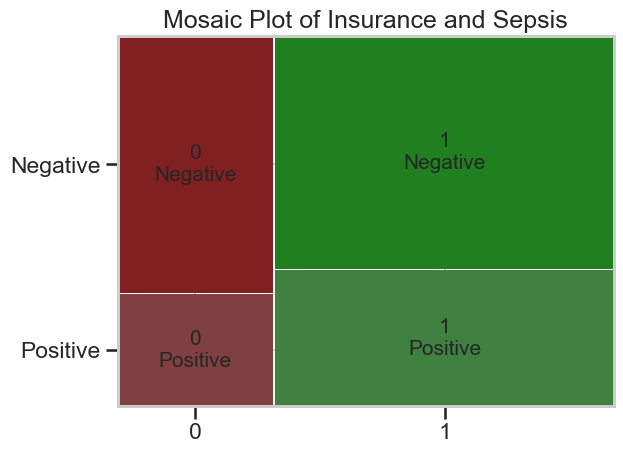



Business Question 2

                  PL         PR        Age
Sepssis                                   
Negative  109.442455  67.872123  31.478261
Positive  140.288462  70.350962  36.697115


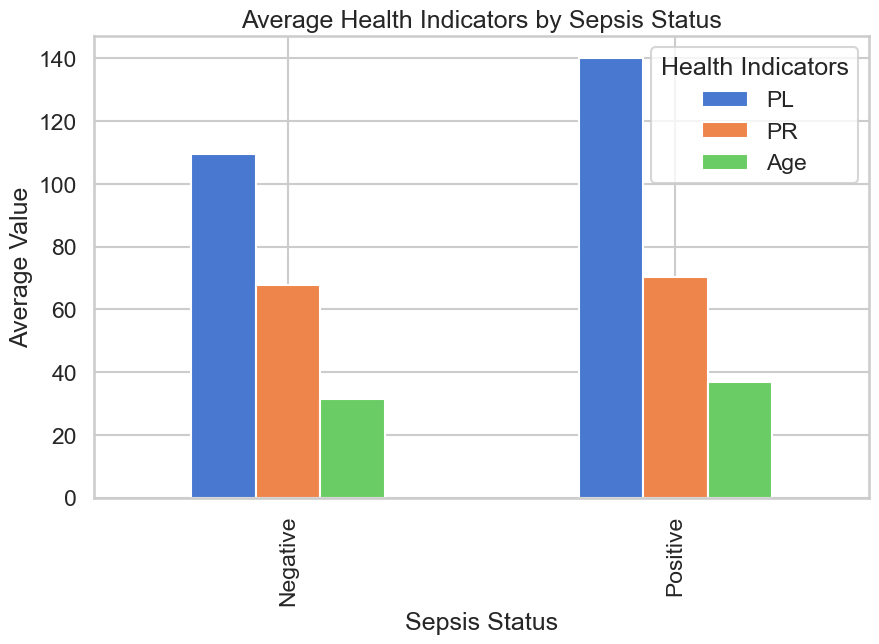



Business Question 3



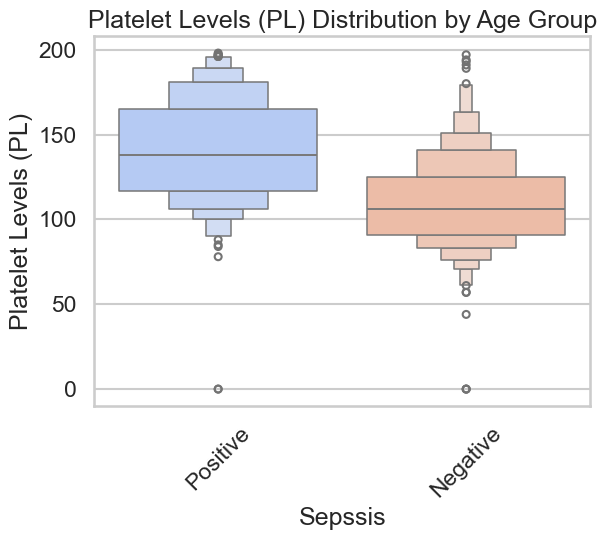



Business Question 4



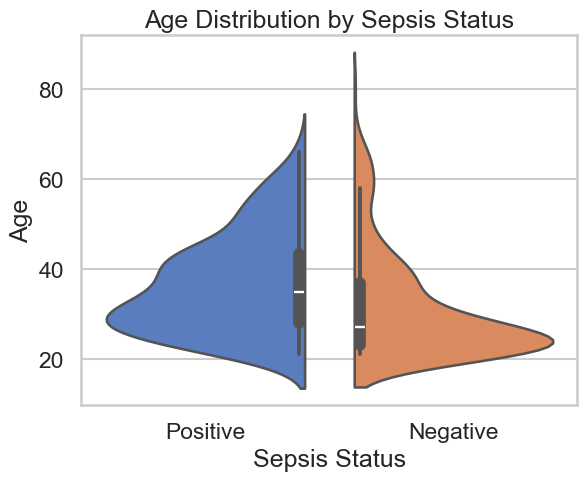



Business Question 5



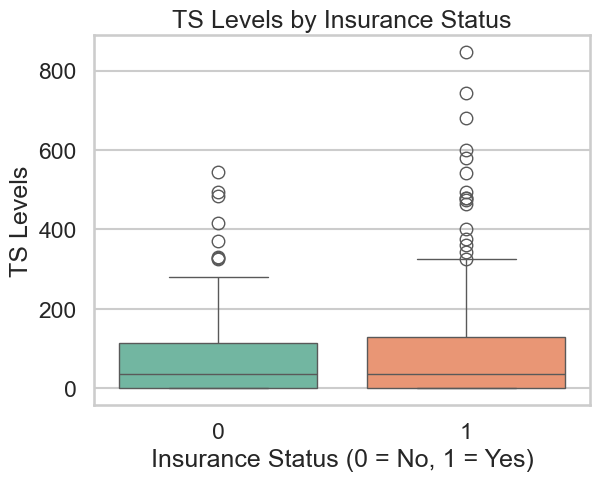



Business Question 6



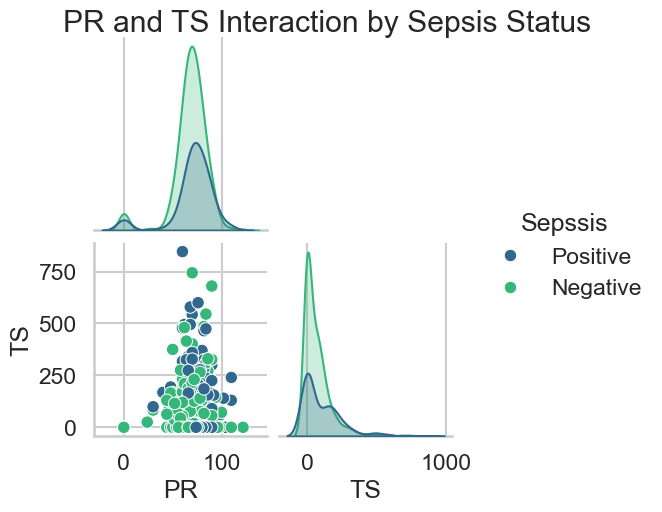



Business Question 7



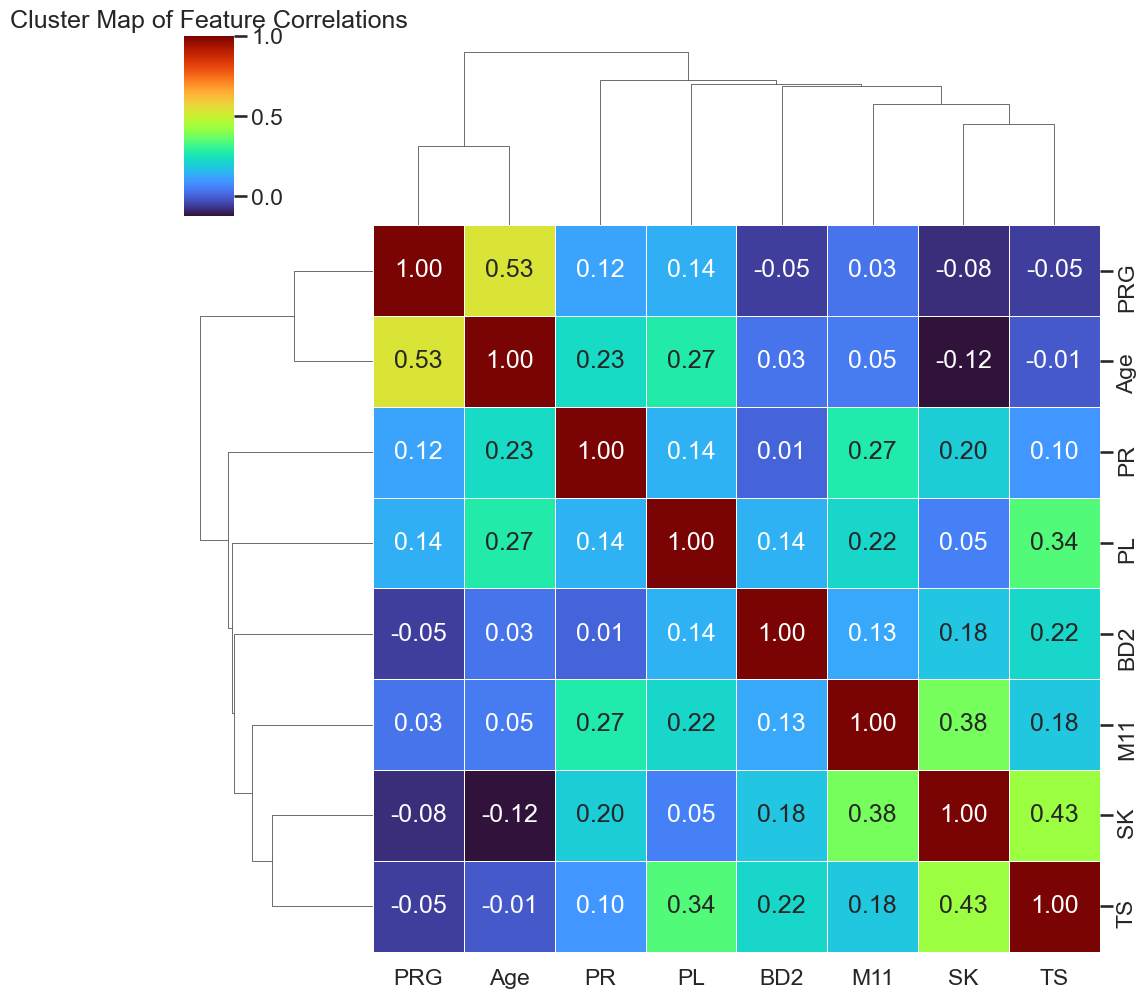

In [20]:
print('Business Question 1')
print()
# Business Question 1
# Does the presence of insurance affect sepsis occurrence?

# Crosstab for Insurance and Sepssis
insurance_sepsis_ct = pd.crosstab(data['Insurance'], data['Sepssis'])

# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(insurance_sepsis_ct)

# Print results with interpretation
print("Contingency Table:")
print(insurance_sepsis_ct)
print("\nChi-square Test Results:")
print(f"Chi-square statistic: χ² = {chi2}")
print(f"p-value: {p}")

if p < 0.05:
    print("\nInterpretation: There is a statistically significant association between Insurance and Sepsis (p-value < 0.05).")
else:
    print("\nInterpretation: No significant association found between Insurance and Sepsis (p-value ≥ 0.05).")

if p < 0.001:
    print("The association is highly significant.")
elif p < 0.01:
    print("The association is very significant.")
elif p < 0.05:
    print("The association is significant.")

# Create the mosaic plot
mosaic(data, ['Insurance', 'Sepssis'])

# Add title and labels
plt.title('Mosaic Plot of Insurance and Sepsis')

# Show the plot
plt.show()
print()
print()


print('Business Question 2')
print()
# Business Question 2
# What are the average values of key health indicators (e.g., PL, PR) for patients with and without sepsis?
# Average values of health indicators grouped by Sepssis
key_indicators = ['PL', 'PR', 'Age']
average_values = data.groupby('Sepssis')[key_indicators].mean()

# Print average values
print(average_values)

# Create bar chart
average_values.plot(kind='bar', figsize=(10, 6))

# Set title and labels
plt.title('Average Health Indicators by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('Average Value')

# Show legend
plt.legend(title='Health Indicators')

# Display chart
plt.show()
print()
print()

print('Business Question 3')
print()

# Business Question 3
# What is the distribution of platelet levels (PL) across different Sepsis groups?

# Boxen plot for PL across Sepssis Groups
sns.boxenplot(data=data, x='Sepssis', y='PL', hue='Sepssis', palette='coolwarm', legend=False)

plt.title('Platelet Levels (PL) Distribution by Age Group')
plt.xlabel('Sepssis')
plt.ylabel('Platelet Levels (PL)')
plt.xticks(rotation=45)
plt.show()
print()
print()

print('Business Question 4')
print()
# Business Question 4
# What is the overall age distribution per Sepssis status ?
# Violin plot for Age distribution against Sepssis status
sns.violinplot(data=data, x='Sepssis', y='Age', hue='Sepssis', palette='muted', split=True, legend = False)
plt.title('Age Distribution by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('Age')
plt.show()
print()
print()

print('Business Question 5')
print()

# Business Question 5
# Is there a difference in TS levels among insured and uninsured patients?
# Box plot for TS by Insurance
sns.boxplot(data=data, x='Insurance', y='TS', hue='Insurance', palette='Set2', legend=False)
plt.title('TS Levels by Insurance Status')
plt.xlabel('Insurance Status (0 = No, 1 = Yes)')
plt.ylabel('TS Levels')
plt.show()
print()
print()

print('Business Question 6')
print()

# Business Question 6
# How do PR (Pulse Rate) and TS (Total Serum) interact for sepsis-positive and sepsis-negative patients?

# Pair plot for PR and TS based on Sepssis
sns.pairplot(data, vars=['PR', 'TS'], hue='Sepssis', palette='viridis', corner=True, diag_kind='kde')
plt.suptitle('PR and TS Interaction by Sepsis Status', y=1.02)
plt.show()
print()
print()

print('Business Question 7')
print()

# Business Question 7
# Which features show strong relationships, and how do they cluster together?
# Correlation Cluster Map
corr_matrix = data.drop(columns=['Insurance', 'Sepssis']).corr()

# Customize clustermap with vibrant colors
sns.clustermap(corr_matrix, cmap="turbo", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Cluster Map of Feature Correlations')
plt.show()


In [21]:
# Features used in training 
print("Training features:", preprocessor.get_feature_names_out())

Training features: ['imputer__PRG' 'imputer__PL' 'imputer__PR' 'imputer__SK' 'imputer__TS'
 'imputer__M11' 'imputer__BD2' 'imputer__Age' 'imputer__Insurance'
 'outlier_handler__PRG' 'outlier_handler__PL' 'outlier_handler__PR'
 'outlier_handler__SK' 'outlier_handler__TS' 'outlier_handler__M11'
 'outlier_handler__BD2' 'outlier_handler__Age'
 'outlier_handler__Insurance' 'scaler__PRG' 'scaler__PL' 'scaler__PR'
 'scaler__SK' 'scaler__TS' 'scaler__M11' 'scaler__BD2' 'scaler__Age'
 'scaler__Insurance']


#### EVALUATION

In [22]:
# Load the test_set data
test_set = pd.read_csv(r"data/Paitients_Files_Test.csv")
# Drop the ID column
test_set = test_set.drop('ID', axis=1)

# Initialize predictions dictionary
test_predictions = {}

for name, pipeline in all_pipelines.items():
    print(f"Generating predictions for Test Set: {name}")
    
    # Generate predictions
    y_test_pred = pipeline.predict(test_set)  # Predicted classes
    y_test_prob = pipeline.predict_proba(test_set)[:, 1]  # Predicted probabilities for ROC AUC (if applicable)
    
    # Store predictions
    test_predictions[name] = {
        "predictions": y_test_pred,
        "probabilities": y_test_prob
    }

# Display predictions for each model
for name, preds in test_predictions.items():
    print(f"\nPredictions for {name}:")
    print(preds['predictions'])
    
    print(f"Probabilities for {name} (if applicable):")
    print(preds['probabilities'])


Generating predictions for Test Set: Logistic Regression


Generating predictions for Test Set: K-Nearest Neighbors
Generating predictions for Test Set: Random Forest

Predictions for Logistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]
Probabilities for Logistic Regression (if applicable):
[0.14323683 0.11468981 0.15729625 0.2236549  0.61327277 0.82850377
 0.40485128 0.85389886 0.04035788 0.70214758 0.12797992 0.22135623
 0.76171983 0.78838186 0.191784   0.59155699 0.11911463 0.16915323
 0.02003446 0.19882156 0.46394332 0.35017813 0.06666044 0.84956333
 0.35405148 0.19290737 0.19411967 0.17031557 0.3342936  0.42765021
 0.0755119  0.19856904 0.18432288 0.13214343 0.1920733  0.0835271
 0.1826908  0.15599056 0.11570028 0.30165487 0.0460924

##### Model Saving 

In [23]:
# Save the model 

for name, pipeline in all_pipelines.items():
    model_filename = f"models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Model {name} saved to {model_filename}")


Model Logistic Regression saved to models/logistic_regression_model.pkl
Model K-Nearest Neighbors saved to models/k-nearest_neighbors_model.pkl
Model Random Forest saved to models/random_forest_model.pkl


In [24]:
# Save the DataFrame
test_set.to_csv('data/tester.csv', index=False)